<div class="alert alert-block alert-info"> <b><span style = "color:#B80000">Library Imports</span></b>

The notebook begins by importing essential libraries: TensorFlow and Matplotlib. 
- <b>TensorFlow</b> is a popular deep learning framework that provides tools to create and train neural networks 
- <b>Matplotlib</b> is a library for creating static, interactive, and animated visualizations in Python.
-----------
-----------
    
</div>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

<div class="alert alert-block alert-info"> <b><span style = "color:#B80000">Data Loading and Preparation</span></b>

- The 'fashion_mnist dataset, which is included in TensorFlow's Keras datasets module, contains 70,000 grayscale images in 10 fashion categories
- The data is split into a training set ('x_train', 'y_train)' with 60,000 images and a test set ('x_test','y_test') with 10,000 images
- The shapes of the test and train data are checked, confirming the demensions of the images (28x28 pixels)
- The pixel values of the images are normalised by dividing by 255. This scales the input features between 0 and 1, which helps with the training process 
-----------
-----------
    
</div>

In [3]:
fashiondata = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashiondata.load_data()

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train, x_test, = x_train/255, x_test/255

<div class="alert alert-block alert-info"> <b><span style = "color:#B80000">Neural Network Architecture</span></b>

- A sequential neural network model is defined using Keras. The architecture consists of a 'Flatten' layer to convert 2D images into a 1D array. 
- A 'Dense' layer is used to prevent overfitting, and a final Dense layer with 10 units and a 'softmax' activation function
- The final layer's 10 units correspond to the 10 different classes of the fashion items
-----------
    
</div>

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

<div class="alert alert-block alert-info"> <b><span style = "color:#B80000">Model Compilation and Training</span></b>

- The model is compiled with the Adam optimizer, sparse categorical cross-entropy as the loss function, and accuracy as the metric for performance evaluation 
- The model is trained for 5 eopchs on the training data with validation on the test data. The output shows the loss and accuracy metrics for both training and validation sets after each epoch. The model achieves high accuracy, suggesting effective learning
- The model is evaluated on the test dataset, yielding a loss and an accuracy score. The accuracy achieved is very high, which shows the model's effectiveness on unseen data 
-----------
    
</div>

In [9]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [10]:
# Train the model and save the history
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2893 - accuracy: 0.9145 - val_loss: 0.1424 - val_accuracy: 0.9594
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1411 - accuracy: 0.9589 - val_loss: 0.1014 - val_accuracy: 0.9700
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1070 - accuracy: 0.9671 - val_loss: 0.0877 - val_accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0864 - accuracy: 0.9736 - val_loss: 0.0789 - val_accuracy: 0.9765
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0752 - accuracy: 0.9762 - val_loss: 0.0767 - val_accuracy: 0.9768


In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0767 - accuracy: 0.9768


[0.07665490359067917, 0.9768000245094299]

<div class="alert alert-block alert-info"> <b><span style = "color:#B80000">Training History Visualisation</span></b>

- The history of the model's training is retrieved, showing keys for loss, accuracy, validation loss and validation accuracy. The history is used to plot the training and validation loss and accuracy over the eopchs, which helps in visualising the learning process and assessing if the model is improving and if it's overfitting or underfitting
    
</div>

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


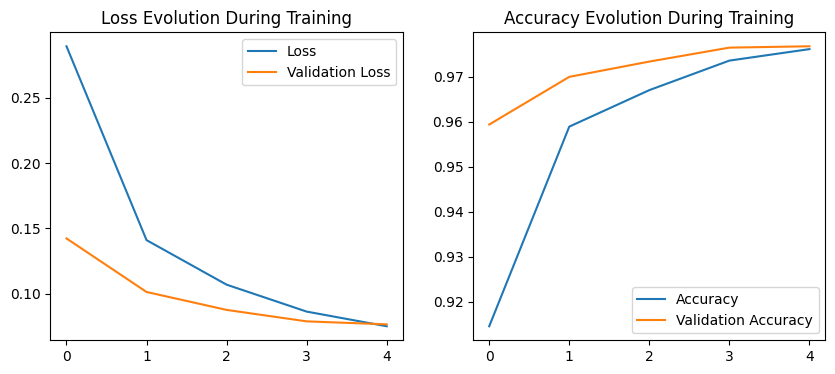

In [13]:
plt.figure(figsize=(10, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution During Training')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Evolution During Training')
plt.legend()

plt.show()

In [14]:
import numpy as np

In [15]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis = 1)

313/313 [==============================] - 1s 2ms/step


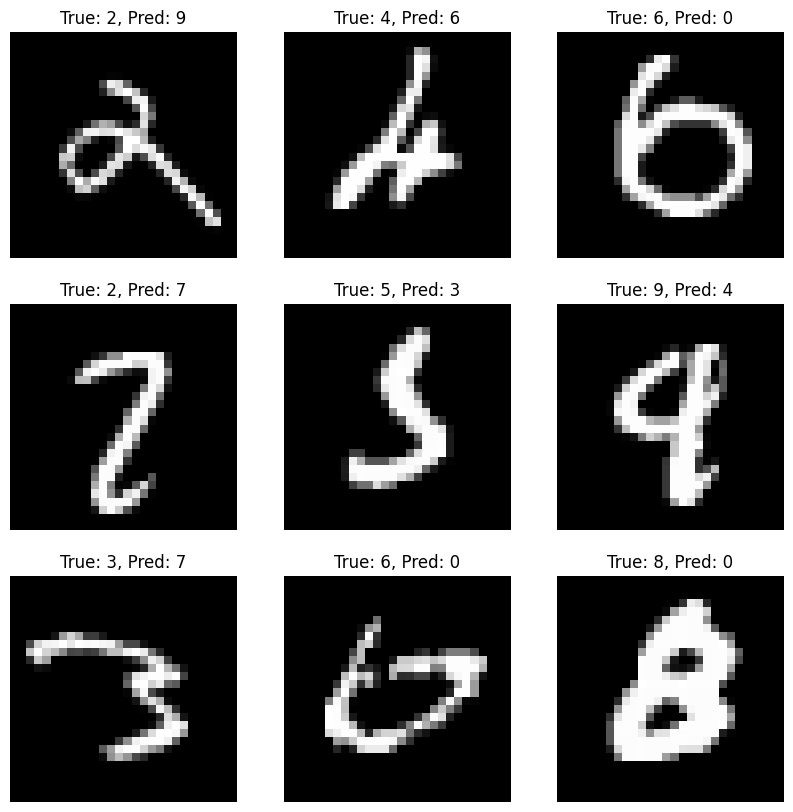

In [16]:
# Display a few misclassified images
misclassified_idxs = np.where(predicted_classes != y_test)[0]
plt.figure(figsize=(10, 10))
for i in range(9): # plot 9 misclassified examples
    idx = misclassified_idxs[i]
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {predicted_classes[idx]}")
    plt.axis('off')
plt.show()